# Split - Apply - Combine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [14]:

from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_b0229f57d26048ebbeee34c5e21b1aaf(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_bf2b79002e2f945583a88d49bdccac9b516fdec6','domain': {'id': '78a6389428974e79aa679e33dc7dc070'},
            'password': 'pQ,Mqd4X1A(VmP(s'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df = pd.read_csv(get_object_storage_file_with_credentials_b0229f57d26048ebbeee34c5e21b1aaf('BigDataRealTimecomPythooneSpark', 'taxis_bikes_nycity.csv'), parse_dates=["Data"])



In [15]:
def calcula_total_segundos(time): 
    if time is np.nan:
        return np.nan
    hrs, mins, seconds = str(time).split(":")
    seconds = int(seconds) + 60 * int(mins) + 60*60*int(hrs)
    return seconds


In [16]:
df["Segundos"] = df.Tempo.map(calcula_total_segundos)

In [17]:
df.fillna(0)

,Data,Distancia,Tempo,Segundos
0,2015-08-02,1.70,0,0.0
1,2015-08-03,1.40,0,0.0
2,2015-08-04,2.10,0,0.0
3,2015-08-06,2.38,0,0.0
4,2015-08-07,2.30,0,0.0
5,2015-08-08,3.40,0,0.0
6,2015-08-09,2.50,0,0.0
7,2015-08-10,3.36,0:28:37,1717.0
8,2015-08-11,1.67,0:13:07,787.0
9,2015-08-12,1.42,0:10:35,635.0


In [18]:
df["Minutos"] = df["Segundos"].map(lambda x: x/60)

In [19]:
df.fillna(0)

,Data,Distancia,Tempo,Segundos,Minutos
0,2015-08-02,1.70,0,0.0,0.000000
1,2015-08-03,1.40,0,0.0,0.000000
2,2015-08-04,2.10,0,0.0,0.000000
3,2015-08-06,2.38,0,0.0,0.000000
4,2015-08-07,2.30,0,0.0,0.000000
5,2015-08-08,3.40,0,0.0,0.000000
6,2015-08-09,2.50,0,0.0,0.000000
7,2015-08-10,3.36,0:28:37,1717.0,28.616667
8,2015-08-11,1.67,0:13:07,787.0,13.116667
9,2015-08-12,1.42,0:10:35,635.0,10.583333


In [21]:
df.Distancia.max()

26.199999999999999

In [22]:
df.Minutos.min()

6.2666666666666666

In [30]:
len(df.Distancia[df.Distancia>10])

4

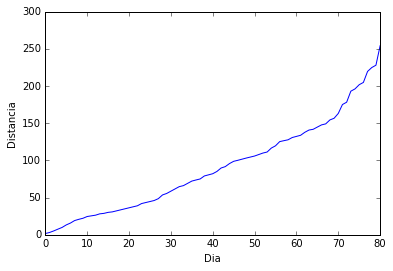

In [34]:
df.Distancia.cumsum().plot()
plt.xlabel("Dia")
plt.ylabel("Distancia")